In [47]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from FReconstrucciondeseñalesapartirdemuestras import h
from FTransformaciones_tf_de_una_señal_no_periodica import EspecCont
from sympy import integrate, init_printing
from sympy.abc import x,y,z,w,n,a,b,c,d
from sympy import cos, sin, pi, exp

- - -

### Ejemplo Nº6: Espectro de la onda cuadrada
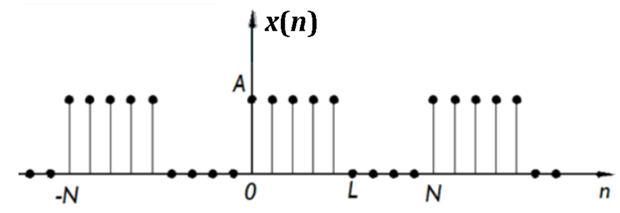

In [7]:
L, N, A = 5, 9, 1
n = np.arange(N)
x6 = np.piecewise(n,[(n>=0)&(n<L)],[lambda n: 1, lambda n: 0])

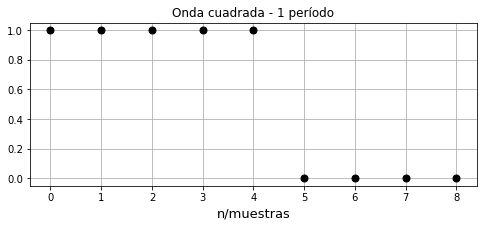

In [8]:
plt.figure(figsize=(8,3))
plt.plot(n,x6,'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.title('Onda cuadrada - 1 período')
plt.xticks(n)
plt.grid(True)
plt.show()

In [9]:
c6 = Espectro(x6)
p6 = np.arange(N)

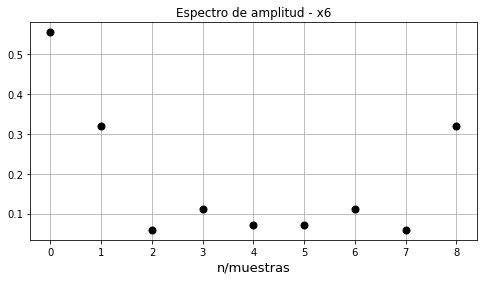

In [10]:
plt.figure(figsize=(8,4))
plt.plot(p6,abs(c6),'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.title('Espectro de amplitud - x6')
plt.xticks(n)
plt.grid(True)
plt.show()

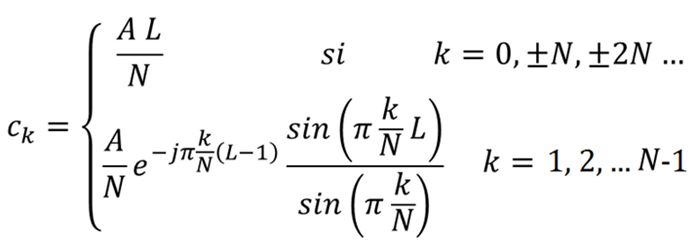

Fórmula en rama para obtener Ck

In [11]:
N1 = 800  #Cantidad grande de muestras
Fs = 100
k = np.arange(N1)
c = np.ndarray(N1,dtype=complex) # defino la longitud del vector c
s = k/Fs

for q in k:
    if q==0:
        c[q]=A*L/N
    else:
        c[q]=(A/N)*np.exp(-1j*np.pi*s[q]*(L-1)/N)*np.sin(np.pi*s[q]*L/N)/np.sin(np.pi*s[q]/N)
        # reemplazo k por s en la ecuación

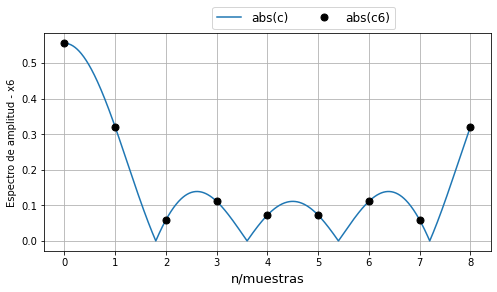

In [12]:
plt.figure(figsize=(8,4))
plt.plot(s, abs(c))
plt.plot(p6,abs(c6),'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.ylabel('Espectro de amplitud - x6')
plt.legend(('abs(c)','abs(c6)'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.xticks(n)
plt.grid(True)
plt.show()

- - -

### Ahora reconstruyo la señal a partir de los coeficientes de Fourier (ecuación de síntesis)
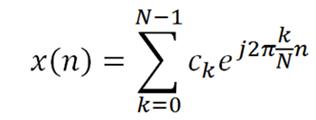

In [14]:
nx = np.arange(36) #Multiplo entero del N, 9x4ciclos=36 
x = np.zeros(len(nx),dtype=complex)
s2 = 0
for i in np.arange(N): #Para hacer la sumatoria
    s2 = s2 + c6[i]*np.exp(2j*np.pi*i*nx/N)
x = s2

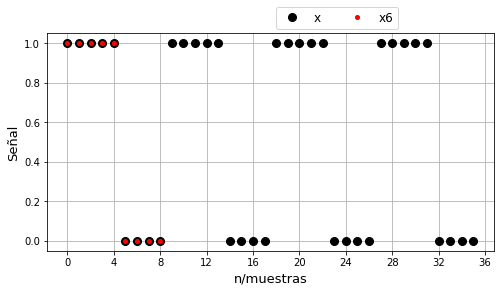

In [15]:
plt.figure(figsize=(8,4))
plt.plot(nx,abs(x),'ok',ms=8)
plt.plot(n,x6,'ro',ms=4)
plt.xlabel('n/muestras', fontsize=13)
plt.ylabel('Señal', fontsize=13)
plt.legend(('x','x6'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.xticks(np.arange(0,37,4))
plt.grid(True)
plt.show()

En rojo está la señal original y en negro está la señal reconstruida.

- - -

### Ejemplo Nº7: Espectro de la onda diente de sierra
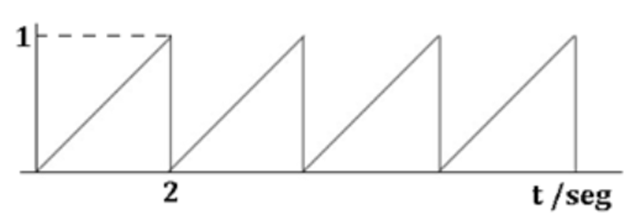
#### Llamo X a la señal de t-continuo y represento un ciclo

In [16]:
t = np.arange(0,2,0.001)
A, T = 1, 2
#A: amplitud    T: período
X = A*t/T #señal de diente de sierra

In [17]:
Fs = 5
N = Fs*T #Muestreo a razón de 5 puntos por seg.
n7 = np.arange(N) #N: cantidad de puntos totales que vamos a tener
x7 = A*n7/(T*Fs)

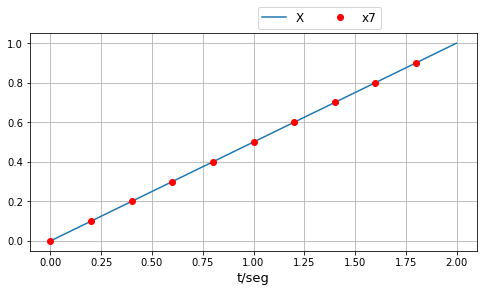

In [18]:
plt.figure(figsize=(8,4))
plt.plot(t,X)
plt.plot(n7/Fs,x7,'ro',ms=6)
plt.xlabel('t/seg', fontsize=13)
plt.legend(('X','x7'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.grid(True)
plt.show()

In [19]:
c7 = Espectro(x7) #del muestreo x7
p7 = np.arange(len(c7))

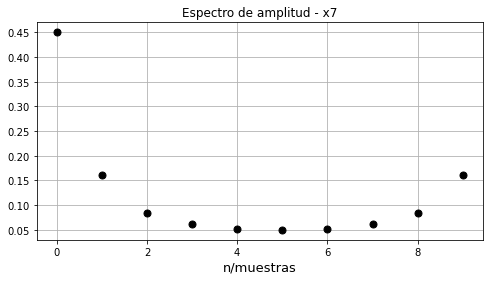

In [20]:
plt.figure(figsize=(8,4))
plt.plot(p7,abs(c7),'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.title('Espectro de amplitud - x7')
plt.grid(True)
plt.show()

### Obtengo la señal a partir de su expectro empleando el código desarrollado en la cátedra.

In [21]:
y7 = señal(c7) #Obtengo la señal a partir de su expectro empleando el código desarrollado en la cátedra.
ny = np.arange(len(y7))

In [22]:
w7 = h(2000,1000,x7,Fs) #Reconstruyo la señal analógica a partir de sus muestras
#x7 es el vector de las muestras
t7 = np.arange(len(w7))/1000

### Reconstruyo la señal a partir de las muestras

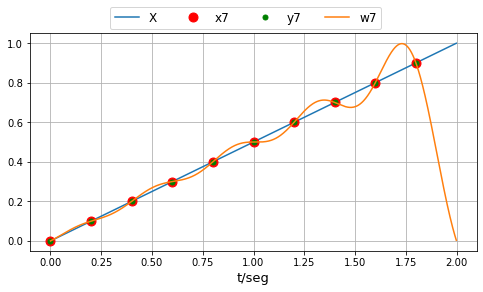

In [23]:
plt.figure(figsize=(8,4))
plt.plot(t,X)
plt.plot(n7/Fs,x7,'ro',ms=9)
plt.plot(ny/Fs,y7,'go',ms=5)
plt.plot(t7,w7)
plt.xlabel('t/seg', fontsize=13)
plt.legend(('X','x7','y7','w7'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=4)
plt.grid(True)
plt.show()

En azul la señal analógica.

En puntos rojos, la señal muestreada.

En puntos verdes, las muestras reconstruidas a partir del espectro.

En naranja, cómo obtenemos la señal analógica a partir de las muestras.

- - -

### Tarea: 
### a) Analizar el efecto de aumentar el número N de puntos muestreados en 1 ciclo manteniendo el resto de los parámetros iguales. 
### (b) Muestrear más de 1 ciclo y rehacer todo lo hecho para este caso.

In [34]:
t = np.arange(0,6,0.001)
A, T = 1, 2
#A: amplitud    T: período
X = A*t/T

In [35]:
Fs = 5
N = Fs*T*3 #Muestreo a razón de 5 puntos por seg.
n7 = np.arange(N) #N: cantidad de puntos totales que vamos a tener
x7 = A*n7/(T*Fs)

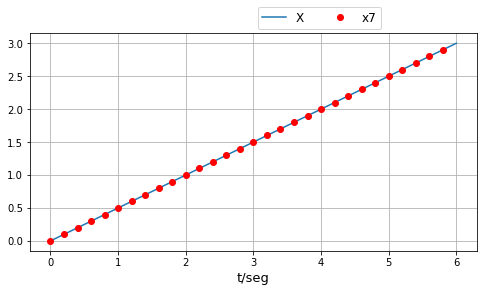

In [36]:
plt.figure(figsize=(8,4))
plt.plot(t,X)
plt.plot(n7/Fs,x7,'ro',ms=6)
plt.xlabel('t/seg', fontsize=13)
plt.legend(('X','x7'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.grid(True)
plt.show()

In [48]:
c7 = Espectro(x7) #del muestreo x7
p7 = np.arange(len(c7))

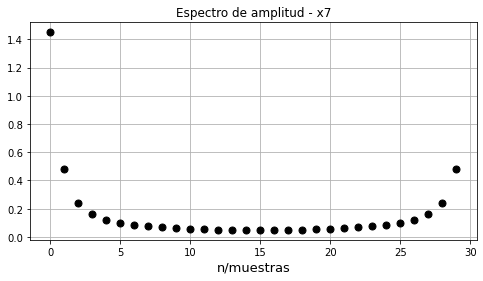

In [49]:
plt.figure(figsize=(8,4))
plt.plot(p7,abs(c7),'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.title('Espectro de amplitud - x7')
plt.grid(True)
plt.show()

In [50]:
y7 = señal(c7) #Obtengo la señal a partir de su expectro empleando el código desarrollado en la cátedra.
ny = np.arange(len(y7))

In [51]:
w7 = h(20000,1000,x7,Fs) #Reconstruyo la señal analógica a partir de sus muestras
#x7 es el vector de las muestras
t7 = np.arange(len(w7))/1000

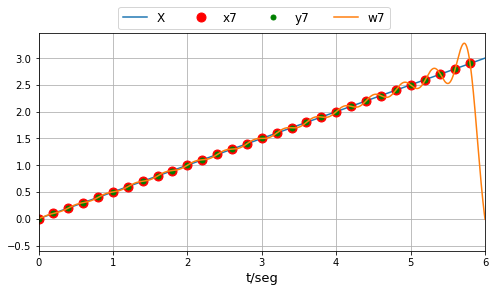

In [52]:
plt.figure(figsize=(8,4))
plt.plot(t,X)
plt.plot(n7/Fs,x7,'ro',ms=9)
plt.plot(ny/Fs,y7,'go',ms=5)
plt.plot(t7,w7)
plt.xlabel('t/seg', fontsize=13)
plt.xlim(0,6)
plt.legend(('X','x7','y7','w7'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=4)
plt.grid(True)
plt.show()

- - - 

- - -

### Análisis de Fourier para señales no periódicas de t-discreto
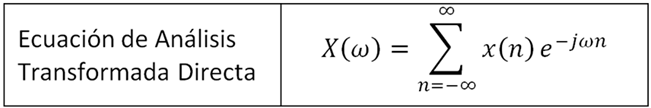

Ecuación de análisis

In [25]:
Fs1 = 1
n1 = np.arange(21,dtype=float)
t1 = n1/Fs1
x1 = np.piecewise(n1,[n1<0],[lambda n1: 0, lambda n1: (1/2)**n1]) 
#Señal con valores decrecientes

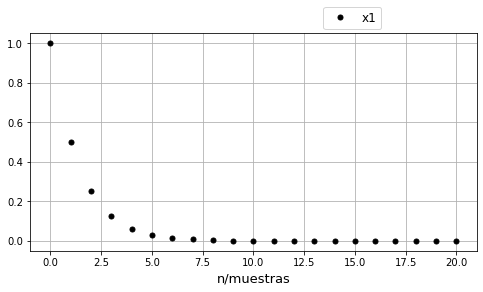

In [26]:
plt.figure(figsize=(8,4))
plt.plot(n1,x1,'ko',ms=5)
plt.xlabel('n/muestras', fontsize=13)
plt.legend(('x1',),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=4)
plt.grid(True)
plt.show()

In [27]:
espec1 = EspecCont(t1,x1,Fs1)

In [28]:
espec1.shape

(2000, 2)

Dos vectores de 2000 puntos cada uno.

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


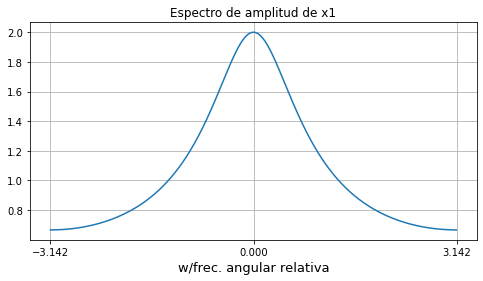

In [29]:
#ESPECTRO DE AMPLITUD

plt.figure(figsize=(8,4))
plt.plot(espec1[:,0],abs(espec1[:,1]))
plt.xticks([-np.pi,0,np.pi])
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.title('Espectro de amplitud de x1')
plt.grid(True)
plt.show()

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


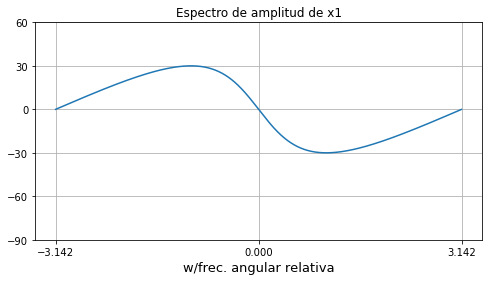

In [30]:
#ESPECTRO DE LA FASE

plt.figure(figsize=(8,4))
plt.plot(espec1[:,0],np.angle(espec1[:,1])*180/np.pi)
plt.xticks([-np.pi,0,np.pi])
plt.yticks(np.arange(-90,90,30))
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.title('Espectro de amplitud de x1')
plt.grid(True)
plt.show()

- - -

### Ejemplo 2: Obtener el espectro de un pulso rectangular
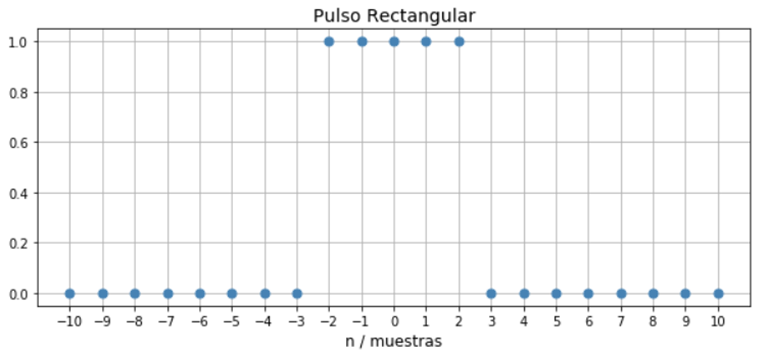

In [31]:
Fs2, N2 = 1, 2
n2 = np.arange(-10,11)
t2 = n2/Fs2
x2 = np.piecewise(n2,[abs(n2)<=N2],[lambda n2: 1, lambda n2: 0]) #Pulso Rectángular

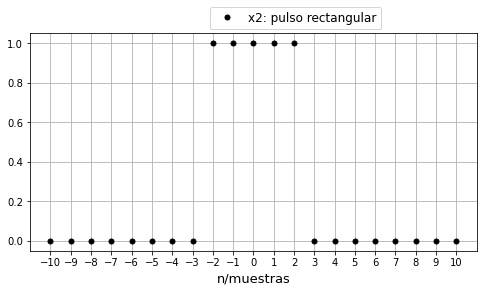

In [32]:
plt.figure(figsize=(8,4))
plt.plot(n2,x2,'ko',ms=5)
plt.xlabel('n/muestras', fontsize=13)
plt.xticks(n2)
plt.legend(('x2: pulso rectangular',),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=4)
plt.grid(True)
plt.show()

In [33]:
espec2 = EspecCont(t2,x2,Fs2)

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


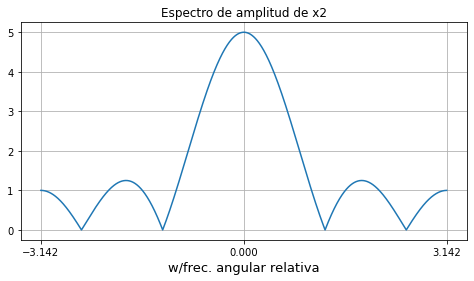

In [34]:
plt.figure(figsize=(8,4))
plt.plot(espec2[:,0],abs(espec2[:,1]))
plt.xticks([-np.pi,0,np.pi])
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.title('Espectro de amplitud de x2')
plt.grid(True)
plt.show()

### La función anterior tiene la misma forma que:
### X1 (w) = sin (w * (2N+1) / 2) / sin (w/2)
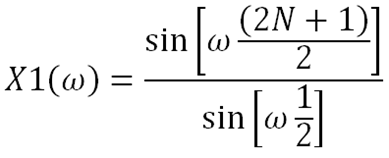

In [35]:
w = np.linspace(-np.pi,np.pi,2000)
X1w = np.sin(w*5/2)/np.sin(w/2)

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


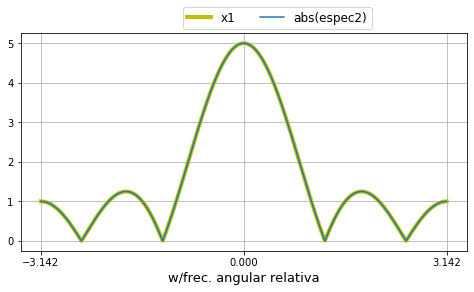

In [36]:
plt.figure(figsize=(8,4))
plt.plot(w,abs(X1w),'y',linewidth=4)
plt.plot(espec2[:,0],abs(espec2[:,1]))
plt.xticks([-np.pi,0,np.pi])
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.legend(('x1','abs(espec2)'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=4)
plt.grid(True)
plt.show()

- - -

### Ejemplo 3: Determinar la secuencia de t-discreto cuya TF es:
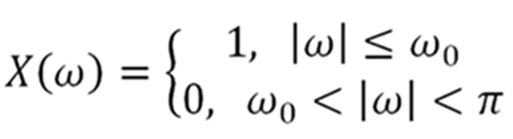

            1 , |w| <= wo
    X(w) = 
            0 , wo < |w| < π

In [42]:
Fsw, Nw = 1000, 2000
p3 = np.arange(-Nw/2,Nw/2)
w0, w3 = 1, p3*np.pi/Fsw
X3 = np.piecewise(p3,[abs(p3)<=w0*Fsw/np.pi],[lambda p3: 1, lambda p3: 0])

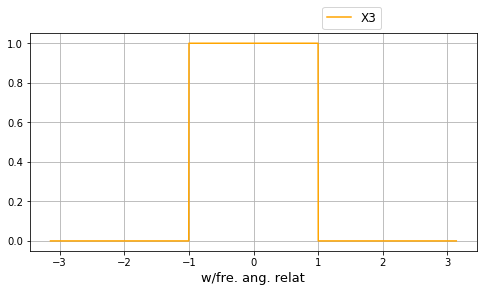

In [43]:
plt.figure(figsize=(8,4))
plt.plot(w3,X3,'orange')
plt.xlabel('w/fre. ang. relat', fontsize=13)
plt.legend(('X3',),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=4)
plt.grid(True)
plt.show()

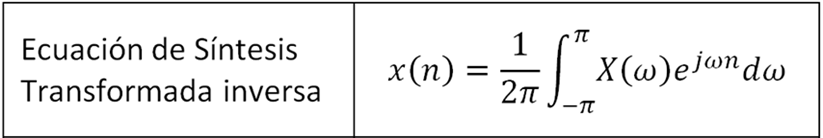

### Pasar del dominio de la frecuencia al dominio del tiempo.

### Es la Ecuación de Síntesis: Transformada inversa

### x(n) = 1/2π  integral de (-π,π) [ X(w) e ** (jwn) ] dw

### Llamo a = w0

In [48]:
integrate(exp(1j*w*n),(w,-a,a))/(2*pi)
#En este caso X(w)=1

Piecewise((-1.0*I*exp(1.0*I*a*n)/n + 1.0*I*exp(-1.0*I*a*n)/n, (n > -oo) & (n < oo) & Ne(n, 0)), (2*a, True))/(2*pi)

### (j/2) (exp(-j a n) - exp(j a n))/(n π)
### El resultado de la integral es: sin(w0 n)/(nπ) si n es distinto de 0 y w0/π si n = 0

In [45]:
n3 = np.arange(-20,21,dtype=float)
x3 = np.piecewise(n3,[n3==0],[lambda n3: w0/np.pi, lambda n3: np.sin(w0*n3)/(n3*np.pi)])

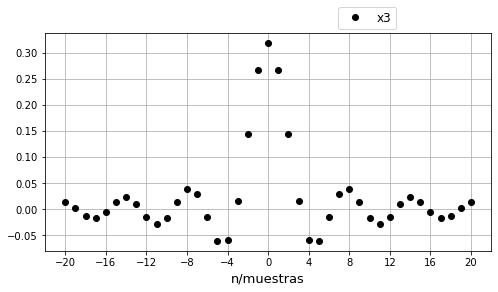

In [46]:
plt.figure(figsize=(8,4))
plt.plot(n3,x3,'ko')
plt.xlabel('n/muestras', fontsize=13)
plt.xticks(np.arange(-20,21,4))
plt.legend(('x3',),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=4)
plt.grid(True)
plt.show()